# Submission 2 &ndash; Intermediate Submission

## Instructions

- Fill out the *Basic Information* and the *Results* sections.
- Make sure that this `.ipynb` file displays correctly in the GitHub file preview, including any visual output.
- If you find that any output does not display correctly, include a static screenshot as an image. For interactive outputs, add a link to a short screencast located in your repository.
- Push all required files before the deadline.

---
## Basic Information

**Team Name:** TODO

**Team Members:**
- TODO
- TODO
- TODO
- TODO

**Dataset Description:**  
(max. 75 words; this serves just as a reminder)

< Your dataset description goes here >

---

## Code

Here you may place any code that is not an immediate part of your submission. Only the content of the *Results* sections will be graded for this submission.

In [13]:
# Import Stuff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.image as mpimg

def plot_a2():

    
    """ 
    Plot 1 Boxplots showing renewable electricity production of the 5 largest electricity producers from 2000 - 2020.
    """
    
    # load data
    data_csv_name='cleaned_countries_only.csv'
    df = pd.read_csv(data_csv_name)
    
    # group by 'Entity' and find the maximum electricity production
    max_generation = df.loc[df.groupby('Entity')['Electricity generation - TWh'].idxmax()]
    
    # get the top 10
    top_10_countries = max_generation.sort_values(by='Electricity generation - TWh', ascending=False).head(10)
    
    # get top 5 countries
    top_5_countries = top_10_countries['Entity'].head(5).tolist()
    
    # collect colors for the horizontal bar chart to match later scatter plot.
    colors = {}
    plt.figure(figsize=(10, 6))
    for country in top_5_countries:
        # Assign a line to each country
        line, = plt.plot([], [], label=country)
        colors[country] = line.get_color()  # get colors
    plt.close()  # Close the dummy plot
    
    # get data from top 5
    top_5_data = max_generation[max_generation['Entity'].isin(top_5_countries)]
    
    # sort the data
    top_5_data = top_5_data.sort_values(by='Electricity generation - TWh', ascending=False)
    
    # plot horizontal bar chart for top 5 countries
    plt.figure(figsize=(13, 7.5))
    bars = plt.barh(
        top_5_data['Entity'],
        top_5_data['Electricity generation - TWh'],
        color=[colors[country] for country in top_5_data['Entity']] # Use colors from dummy plot so the match scatter plot colors.
    
    )
    
    # add values inside the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width - (width * 0.05),  # put it inside the bar
            bar.get_y() + bar.get_height() / 2,
            f'{width:.0f}',  # no decimals
            va='center',
            ha='right',  # align text to the right, inside the bar
            fontsize=26,  # smaller text size for values
            color='white',  # white text for contrast
            weight='bold'
        )
    
    # add country names on the right
    for i in range(len(bars)):
        bar = bars[i]
        country = top_5_data['Entity'].iloc[i] 
        plt.text(
            bar.get_width() + 300,  # offset to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # center text vertically
            country,
            va='center',
            ha='left',
            fontsize=35,  # larger text size for country names
            weight='bold',
            color='black'
        )
    
    # set a  fitting title 
    plt.title("Top 5 Electricity Producers (2000-2020) [TWh/year]",loc='left', fontsize=35, weight='bold', pad=20)
    
    # remove axes and grid so it can function as a label.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    plt.gca().grid(False)
    
    # highest value on top
    plt.gca().invert_yaxis()
    
    
    # save as file to load as inset.
    output_file = 'electricity_generation_chart.png'  # Set file name
    plt.savefig(output_file, bbox_inches='tight', dpi=600)  # Save for later use
    plt.close()  # close the dummy plot
    
    renewables_df = pd.read_csv('share-electricity-renewables.csv')
    filtered_renewables = renewables_df[renewables_df['Entity'].isin(top_5_countries)] # get renewable electricity production for the top 5 countries.
    
    # only values between 2000-2023
    filtered_renewables = filtered_renewables[
        (filtered_renewables['Year'] >= 2000) & (filtered_renewables['Year'] <= 2020)
    ]
    
    # load the saved image 
    img = mpimg.imread('electricity_generation_chart.png')
    
    # set size
    plt.figure(figsize=(14, 7.5))
    
    # add labels
    plt.title('Renewable Electricity Rate (2000-2020)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Renewables (% of Electricity)', fontsize=14)
    
    # only show x-values 2000,2005,2010,2015,2020
    plt.xticks([2000,2005, 2010, 2015, 2020], fontsize=12)
    
    # plot with connected dots
    for country in top_5_countries:
        country_data = filtered_renewables[filtered_renewables['Entity'] == country]
        plt.scatter(country_data['Year'], country_data['Renewables - % electricity'], label=country, s=50)
        plt.plot(country_data['Year'], country_data['Renewables - % electricity'], linestyle='-', alpha=0.7)
    
    
    # here I define the dimensions used for importing the previous figure. Needs some playing around to work.
    width = 0.22
    height = 0.17
    pos_x = 0.13
    pos_y = 0.42
    inset_ax = plt.gcf().add_axes([pos_x, pos_y, pos_x + width, pos_y + height])  # [left, bottom, width, height] in figure coordinates
    inset_ax.imshow(img, alpha = 1)
    inset_ax.axis('off')  # Turn off the axe
    
    # show plot
    plt.grid(False)
    plt.show()
    
    """ 
    Plot 2 Boxplots showing distribution of renewable electricity production per continent from 2000 - 2020.
    """
    
    # this csv.file has values for 2000,2010 and 2020 of renewable energy production per country as well as it's continent.
    file_path = "filtered_electricity_renewables_all_years.csv" 
    data = pd.read_csv(file_path)
    
    # renaming some columns
    data = data.rename(
        columns={
            "Year": "years",
            "Renewables - % electricity": "renewable_percentage",
            "Continent": "continent"
        }
    )
    # match figure size with top plot.
    plt.figure(figsize=(14, 7.5))
    
    # add labels
    plt.title("Renewable Electricity Percentage by Continent and Year", fontsize=14)
    plt.xlabel("Years", fontsize=12)
    plt.ylabel("% Electricity from Renewables", fontsize=12)
    
    # switch to dark mode ;)
    plt.gca().set_facecolor("darkgray") 
    
    # this defines the larger background boxplot 
    combined_box = sns.boxplot(
        data=data,
        x="years",
        y="renewable_percentage",
        color="lightgray",  
        width=0.7,          
        dodge=False,        
        whiskerprops={'linewidth': 0},  # Remove whiskers
        capprops={'linewidth': 0},
        boxprops={'linewidth': 0} ,
        medianprops={'linewidth': 1.5, 'color': 'black'} # Using black and bigger width for visual clarity
    )
    
    # plot the boxplots split by continents (base layer)
    continent_boxplot = sns.boxplot(
        data=data,
        x="years",
        y="renewable_percentage",
        hue="continent",
        showfliers=False,  # Remove outliers
        dodge=True,        # Split the continents
        width=0.6,          # Wider boxes for the split data  # Removes the whiskers
        whiskerprops={'linewidth': 0},  # Removes the whiskers
        capprops={'linewidth': 0},
        boxprops={'linewidth': 0.5}, 
        medianprops={'linewidth': 1, 'color': 'white'} # Using black and less width for visual clarity and separation from "big" median.
    )
    
    # adjust transparency
    for patch in combined_box.patches:
        # this is to identify the background boxplot by color and leave it's alpha at 1.
        if patch.get_facecolor() == (0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0):  
            pass
        else:
            # these are the smaller boxplots, setting alpha to 0.8 looks nicer.
            patch.set_alpha(0.8)  
    
    # add a custom legend entry for the combined boxplot
    handles, labels = continent_boxplot.get_legend_handles_labels()
    
    # add a legend
    plt.legend(
        handles=handles,
        title="Continent",
        bbox_to_anchor=(0.5, 0.95),  # center the legend above the plot
        loc='center',  # set a center
        ncol=len(handles) + 1,  # show labels in a row
    )
    
    # show the plot
    plt.grid(False)
    plt.show()

---
## Results &ndash; Simple Hypotheses/Tasks

### A.1

Restate your hypothesis/task below.

**Hypthesis/Task A.1:** TODO

Place your visualizations below (max. 2). Make sure that everyting displays correctly in the GitHub file preview.

TODO

Describe your visualizations and findings. Be clear which chart(s) you are referring to and relate your findings to the hypothesis/task.
Use no more than 150 words and indicate the word count of your description below.

**Description:** TODO

**Word count**: TODO

### A.2

Restate your hypothesis/task below.

**Hypthesis A.2:** There is a positive correlation between time and the sustainable energy ratio over a specified year range (e.g., 1980 to 2000).

Place your visualizations below (max. 2). Make sure that everyting displays correctly in the GitHub file preview.

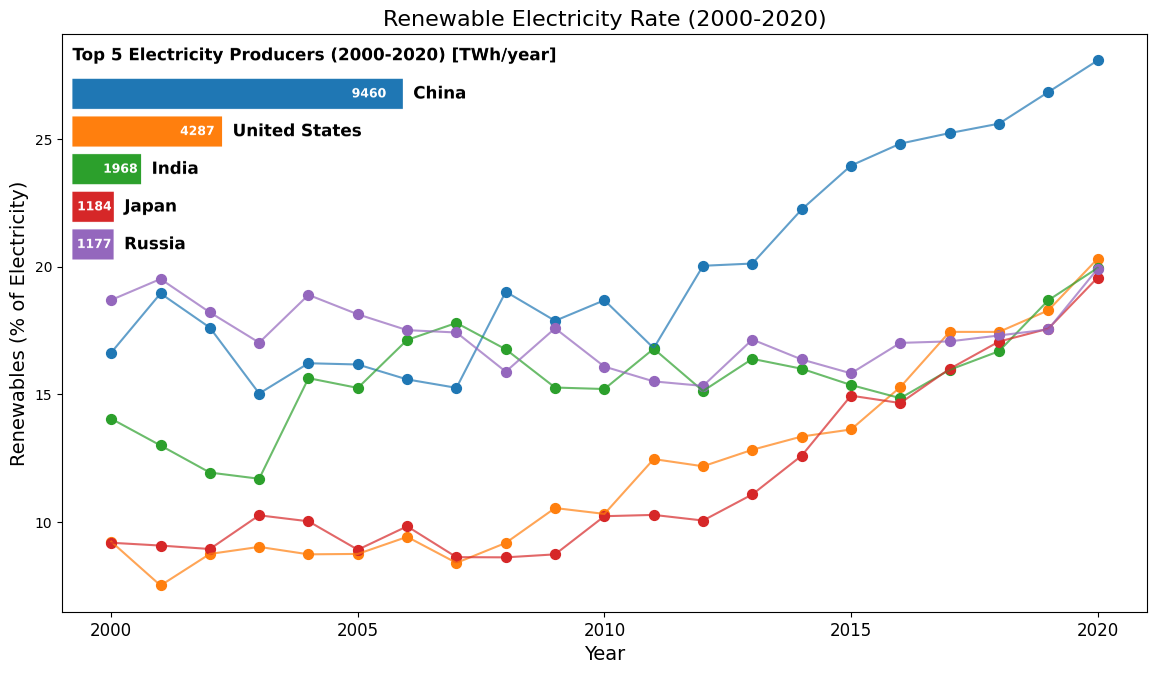

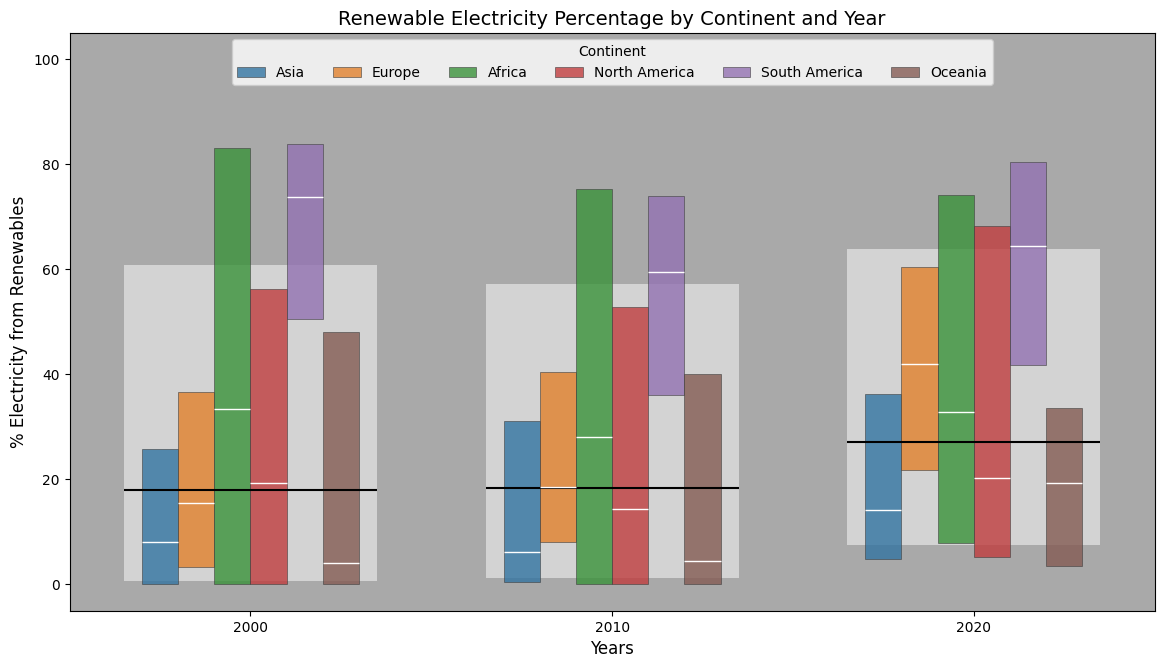

In [14]:
plot_a2()

Describe your visualizations and findings. Be clear which chart(s) you are referring to and relate your findings to the hypothesis/task. Use no more than 150 words and indicate the word count of your description below.

**Description:** To examine our hypothesis, we present two visualizations showing changes in the ratio of electricity from renewable sources, an indicator of the shift to sustainable energy, from 2000 to 2020.
The graph on top highlights the five largest energy-producing countries. It uses the maximum energy production (TWh/year) during the timeframe in a horizontal bar chart, which also serves as labels for a scatter plot showing the percentage of renewable electricity over time. This strongly supports our hypothesis by showing the increase in renewable electricity production for the five most important energy producers.
The graph below groups data by continent using boxplots to show quartiles and medians for each. A larger background boxplot shows the combined distribution. This also clearly demonstrates an increase during the timeframe.

**Word count**: 125